In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\sigen\Desktop\diabetes.csv')
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [3]:
# Data Cleaning
df = df[df['Glucose'] !=0]
df = df[df['BloodPressure'] !=0]
df = df[df['SkinThickness'] !=0]
df = df[df['Insulin'] !=0]
df = df[df['BMI'] !=0]


In [4]:
df.head()
# cnt = df.count
# print(cnt)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
3             1       89             66             23       94  28.1   
4             0      137             40             35      168  43.1   
6             3       78             50             32       88  31.0   
8             2      197             70             45      543  30.5   
13            1      189             60             23      846  30.1   

    DiabetesPedigreeFunction  Age  Outcome  
3                      0.167   21        0  
4                      2.288   33        1  
6                      0.248   26        1  
8                      0.158   53        1  
13                     0.398   59        1

In [5]:
# EDA
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   392.000000  392.000000     392.000000     392.000000  392.000000   
mean      3.301020  122.627551      70.663265      29.145408  156.056122   
std       3.211424   30.860781      12.496092      10.516424  118.841690   
min       0.000000   56.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.000000      62.000000      21.000000   76.750000   
50%       2.000000  119.000000      70.000000      29.000000  125.500000   
75%       5.000000  143.000000      78.000000      37.000000  190.000000   
max      17.000000  198.000000     110.000000      63.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  392.000000                392.000000  392.000000  392.000000  
mean    33.086224                  0.523046   30.864796    0.331633  
std      7.027659                  0.345488   10.200777    0.471401  
min     18.200000                  0.085000   21.000000    0.000000  
25%     28.400000                  0.269750   23.000000    0.000000  
50%     33.200000                  0.449500   27.000000    0.000000  
75%     37.100000                  0.687000   36.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [6]:
df.plot.box(title="Boxplot", figsize=(20, 15), grid=True)
plt.show(block=True)

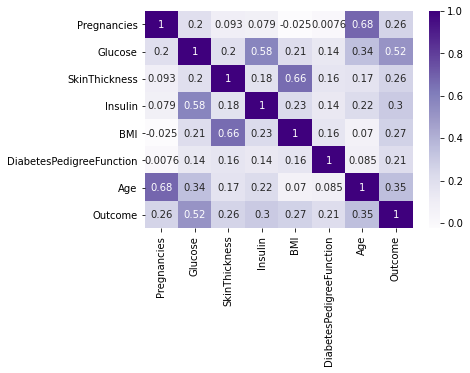

In [7]:
df[["Pregnancies", "Glucose", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]].corr()
sns.heatmap(df[["Pregnancies", "Glucose", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]].corr(), annot=True, cmap="Purples")
plt.show()

In [8]:
# T-test
import researchpy as rp
import scipy.stats as stats
from scipy import stats

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 3 to 765
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               392 non-null    int64  
 1   Glucose                   392 non-null    int64  
 2   BloodPressure             392 non-null    int64  
 3   SkinThickness             392 non-null    int64  
 4   Insulin                   392 non-null    int64  
 5   BMI                       392 non-null    float64
 6   DiabetesPedigreeFunction  392 non-null    float64
 7   Age                       392 non-null    int64  
 8   Outcome                   392 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 30.6 KB


In [10]:
tStat, pValue = stats.ttest_ind(df['BloodPressure'][df['Outcome'] == 0], df['BloodPressure'][df['Outcome'] == 1], equal_var=False)
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

P-Value:0.00021311464802764178 T-Statistic:-3.7610252808184734


In [11]:
# MLR
X = df[["Pregnancies", "Glucose", "Outcome", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]]
y = df["BloodPressure"]

In [12]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as smodel
lm = linear_model.LinearRegression()
lm.fit(X, y)
X = smodel.add_constant(X) 
l_m = smodel.OLS(y, X).fit()
summary = l_m.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:          BloodPressure   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     11.10
Date:                Mon, 28 Mar 2022   Prob (F-statistic):           3.94e-14
Time:                        21:52:32   Log-Likelihood:                -1504.8
No. Observations:                 392   AIC:                             3028.
Df Residuals:                     383   BIC:                             3063.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [14]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [15]:
coeff_df = pd.DataFrame(regressor.coef_,X.columns, columns=['Coefficient'])
print(coeff_df)
print('Intercept: \n', regressor.intercept_)

                          Coefficient
const                        0.000000
Pregnancies                  0.171486
Glucose                      0.044106
Outcome                      0.046459
SkinThickness               -0.083292
Insulin                     -0.011424
BMI                          0.647391
DiabetesPedigreeFunction    -1.983249
Age                          0.301863
Intercept: 
 39.38065807028417


In [16]:
y_pred = regressor.predict(X_test)

In [17]:
dataframe = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
dataframe

Actual  Predicted
296      70  65.144558
545      90  76.182146
142      52  68.652288
723      86  79.193661
644      72  64.773381
..      ...        ...
208      64  67.802901
135      60  73.036745
120      76  81.248018
508      50  64.744626
421      68  63.560804

[79 rows x 2 columns]

In [19]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 10.060858412505775
MSE: 170.9920161258459
RMSE: 13.076391556000681


In [ ]:
# ANOVA
adf=df[['Age','BloodPressure']]
adf.head(20)
max(df["Age"])

In [ ]:
Category = pd.cut(adf.Age,bins=[20,39,59,85],labels=["Adult", "Middle Age Adult", "Senior Adult"])
adf.insert(0, "AgeGroup", Category)
to_drop = ['Age']
adf.drop(columns=to_drop, inplace=True)
adf.head()

In [ ]:
adf.head(20)

In [ ]:
import statsmodels.api as sa
import statsmodels.formula.api as sfa
import scikit_posthocs as sp

In [ ]:
lm = sfa.ols('BloodPressure ~ C(AgeGroup)', data=adf).fit()

In [ ]:
(lm.summary())

In [ ]:
table = sa.stats.anova_lm(lm)
print(table)

In [ ]:
sp.posthoc_ttest(adf, val_col='BloodPressure', group_col='AgeGroup', p_adjust='holm')